# E-Commerce - EDA - Python 

In [1]:
#import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Data Load
#df=pd.read_csv('path') for reading csv file

data=pd.read_csv('Ecom.csv',encoding= 'unicode_escape')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data.head() #Retrives the First five Rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data['Total Bill Value']=data['Quantity']*data['UnitPrice']

In [4]:
data.isnull().sum()

InvoiceNo                0
StockCode                0
Description           1454
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          135080
Country                  0
Total Bill Value         0
dtype: int64

In [6]:
data.dropna(how='any',inplace=True) #Dropping NuLL Values or Missing Values

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
Total Bill Value    0
dtype: int64

### 1D - Aggregation

In [19]:
#data.agg('Quantity')
data.describe()

,Quantity,UnitPrice,CustomerID,Total Bill Value
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Bill Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France,16.60


In [ ]:
data['InvoiceNo'].count()

406829

### 1E - Unqiue Values Across All Columns 

In [ ]:
data['InvoiceNo'].nunique()

22190

In [ ]:
data['CustomerID'].nunique()

4372

In [ ]:
data.nunique()

InvoiceNo           22190
StockCode            3684
Description          3896
Quantity              436
InvoiceDate         20460
UnitPrice             620
CustomerID           4372
Country                37
Total Bill Value     4041
dtype: int64

###  1F- Duplicate values across all columns 

In [ ]:
data.duplicated().sum() #Doubt

5225

### 3.Remove Duplicate Rows

In [ ]:
data.duplicated(subset=None, keep='first').sum()

5225

In [ ]:
data.drop_duplicates(subset =None, keep = False, inplace = True)

In [ ]:
data.duplicated(subset=None, keep='first').sum()

0

### 4. Remove rows which have negative values in Quantity column

In [ ]:
RemoveQu=data['Quantity']<0
RemoveQu.sum()


8844

In [ ]:
data.drop( data[ data['Quantity'] < 0 ].index , inplace=True)

In [ ]:
RemoveQu=data['Quantity']<0
RemoveQu.sum()


0

### 5. Add the columns - Month, Day and Hour for the invoice

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data['Month']=data['InvoiceDate'].dt.month
data['Day']=data['InvoiceDate'].dt.day
data['Hour']=data['InvoiceDate'].dt.hour
data['Day'] = data['InvoiceDate'].apply(lambda time: time.dayofweek)
data['Hour'] = data['InvoiceDate'].apply(lambda hour:hour)

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Bill Value,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,2010-12-01 08:26:00
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12,4,2011-12-09 12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,4,2011-12-09 12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,4,2011-12-09 12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,4,2011-12-09 12:50:00


### 6. How many orders made by the customers?

In [ ]:
data['Quantity'].sum()

5151081

In [ ]:
data.groupby(['CustomerID'],as_index=False)['Quantity'].sum().head() #Total Number of Quantaties

,CustomerID,Quantity
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


In [ ]:
data.groupby(['CustomerID'],as_index=False)['Quantity'].count().head() #Total Number of Orders Placed

,CustomerID,Quantity
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


### 7. TOP 5 customers with higher number of orders 

In [ ]:
a=data.groupby(['CustomerID'])['InvoiceNo'].count()
data.sort_values(by='InvoiceNo',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Bill Value,Month,Day,Hour
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,12,4,2011-12-09 12:50:00
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,15.60,12,4,2011-12-09 12:50:00
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80,12,4,2011-12-09 12:50:00
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80,12,4,2011-12-09 12:50:00
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00,12,4,2011-12-09 12:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,2010-12-01 08:26:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,12,2,2010-12-01 08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,12,2,2010-12-01 08:26:00


### 8. How much money spent by the customers? 

In [ ]:
data['Total Bill Value'].sum()

8864767.054

In [ ]:
data.groupby(['CustomerID'],as_index=False)['Total Bill Value'].sum()

,CustomerID,Total Bill Value
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,1998.68


### 9. TOP 5 customers with highest money spent 

In [ ]:
data.groupby("CustomerID").sum().sort_values("Total Bill Value", ascending=False).head(5)

,Quantity,UnitPrice,Total Bill Value,Month,Day
CustomerID,,,,,
14646.0,197491,5176.09,280206.02,14191,4472
18102.0,64124,1940.92,259657.30,3746,830
17450.0,69953,1127.32,194230.79,2276,501
16446.0,80997,4.98,168472.50,22,8
14911.0,80465,26114.98,143597.28,46136,13227


### 10. How many orders per month? 

In [ ]:
data.groupby(['Month'],as_index=False)['Quantity'].sum()

,Month,Quantity
0,1,347930
1,2,264457
2,3,346753
3,4,290533
4,5,372250
5,6,362392
6,7,365332
7,8,397454
8,9,542465
9,10,589586


,Month,InvoiceNo
0,1,20769
1,2,19495
2,3,26592
3,4,22240
4,5,27840
5,6,26710
6,7,26344
7,8,26586
8,9,39335
9,10,48099


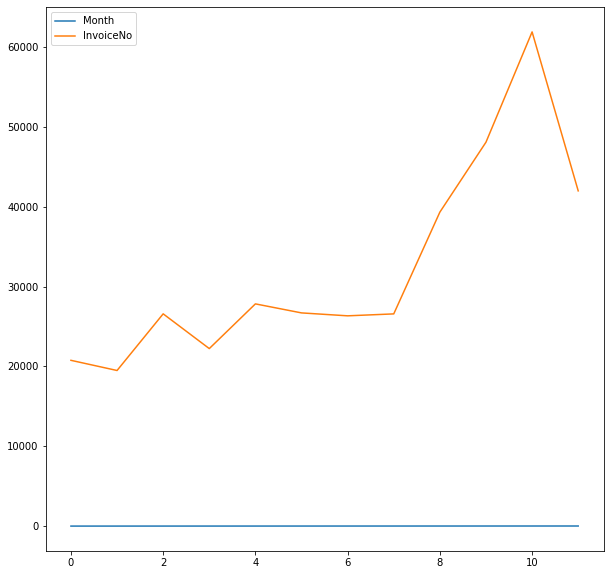

In [ ]:
data.groupby(['Month'],as_index=False)['InvoiceNo'].count().plot(kind='line',figsize=(10,10))
data.groupby(['Month'],as_index=False)['InvoiceNo'].count()

### 11. How many orders per day?

In [ ]:
data.groupby(['Day'],as_index=False)['InvoiceNo'].count()

,Day,InvoiceNo
0,0,63608
1,1,65072
2,2,67258
3,3,78514
4,4,53671
5,6,59800


### 12. How many orders per hour? 

### 13. How many orders for each country? 


In [ ]:
data.groupby(['Country'])['Quantity'].count()

Country
Australia                 1183
Austria                    398
Bahrain                     17
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            746
Cyprus                     593
Czech Republic              25
Denmark                    380
EIRE                      7218
European Community          60
Finland                    685
France                    8312
Germany                   9012
Greece                     145
Iceland                    182
Israel                     242
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2363
Norway                    1072
Poland                     330
Portugal                  1445
RSA                         58
Saudi Arabia                 9
Singapore                  222
Spain                     2475
Sweden                     449


### 14. Orders trend across months 


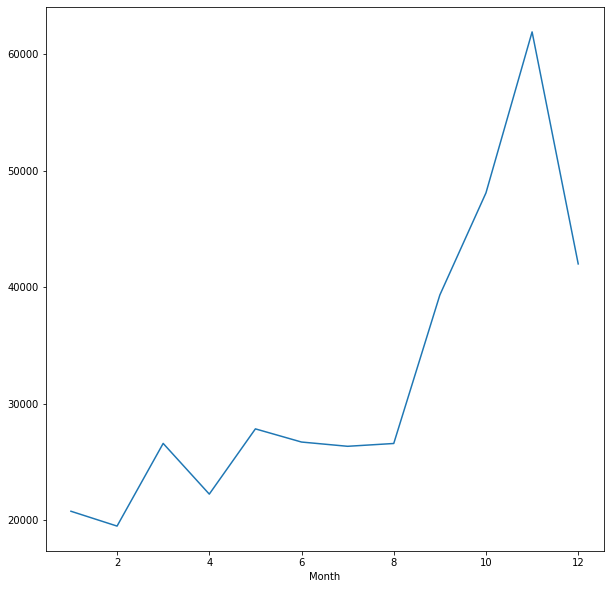

In [ ]:
data.groupby(['Month'])['Quantity'].count().plot(kind='line',figsize=(10,10))

### 15. How much money spent by each country? 

In [ ]:
data.groupby(['Country'])['Total Bill Value'].sum()

Country
Australia               1.383863e+05
Austria                 1.019868e+04
Bahrain                 5.484000e+02
Belgium                 4.119634e+04
Brazil                  1.143600e+03
Canada                  3.666380e+03
Channel Islands         2.043064e+04
Cyprus                  1.341947e+04
Czech Republic          8.267400e+02
Denmark                 1.895534e+04
EIRE                    2.649790e+05
European Community      1.300250e+03
Finland                 2.254608e+04
France                  2.088446e+05
Germany                 2.284897e+05
Greece                  4.760520e+03
Iceland                 4.310000e+03
Israel                  7.209990e+03
Italy                   1.748324e+04
Japan                   3.741637e+04
Lebanon                 1.693880e+03
Lithuania               1.661060e+03
Malta                   2.725590e+03
Netherlands             2.854463e+05
Norway                  3.616544e+04
Poland                  7.334650e+03
Portugal                3.3314